In [201]:
from IPython.display import display, HTML

display(HTML("""
<style>
.container {
    width: 100% !important;
}
</style>
"""))


## Ex 1: Plot two beating waves

In [ ]:
# Define parameters
fs = 10000  # Sampling frequency (Hz)
duration = 2  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Define two slightly different frequencies
f1 = 450 + 20  # Hz
f2 = 450  # Hz

# Generate sound waves
y1 = np.cos(2 * np.pi * f1 * t)
y2 = np.cos(2 * np.pi * f2 * t)

total_wave = y1 + y2  # Resulting wave showing beating effect

envelope = 2 * np.cos(np.pi * (f2 - f1) * t)  # Amplitude envelope

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, total_wave, label='Beating Wave', alpha=0.7)
plt.plot(t, envelope, 'r--', label='Envelope')
plt.plot(t, -envelope, 'r--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Beating of Two Sound Waves')
plt.legend()
plt.xlim(0, 0.1)  # Zoom in to see the beat effect
# plt.grid()
plt.show()

## Ex 2: Understanding bradcasting vs meshgrid

In [202]:
import numpy as np

# Define base 1D arrays
x = np.arange(2)               # [0, 1]
y = 2 * np.arange(3)           # [0, 2, 4]
eps = np.arange(6)             # [0, 1, 2, 3, 4, 5]

print("x =", x)
print("y =", y)
print("eps =", eps)

x = [0 1]
y = [0 2 4]
eps = [0 1 2 3 4 5]


In [203]:
# Create 2D meshgrids using 'ij' indexing (matrix-style)
X, Y = np.meshgrid(x, y, indexing='ij')
print("\nX =\n", X)
print("Y =\n", Y)


X =
 [[0 0 0]
 [1 1 1]]
Y =
 [[0 2 4]
 [0 2 4]]


In [204]:
# Expand X and Y to 3D by adding a new axis for broadcasting with eps
X3 = X[:, :, np.newaxis]       # shape (2, 3, 1)
Y3 = Y[:, :, np.newaxis]       # shape (2, 3, 1)
print("\nX3.shape =", X3.shape)
print("X3 =\n", X3)
print("Y3.shape =", Y3.shape)
print("Y3 =\n", Y3)

# Reshape eps to 3D for broadcasting
ep3 = eps[np.newaxis, np.newaxis, :]   # shape (1, 1, 6)
print("\nep3.shape =", ep3.shape)
print("ep3 =\n", ep3)


X3.shape = (2, 3, 1)
X3 =
 [[[0]
  [0]
  [0]]

 [[1]
  [1]
  [1]]]
Y3.shape = (2, 3, 1)
Y3 =
 [[[0]
  [2]
  [4]]

 [[0]
  [2]
  [4]]]

ep3.shape = (1, 1, 6)
ep3 =
 [[[0 1 2 3 4 5]]]


In [205]:
# Broadcast X, Y, and eps to common 3D shape (2, 3, 6)
X3_broadcast = X3 + ep3 - ep3          # broadcast X3 to shape of ep3
Y3_broadcast = Y3 + ep3 - ep3          # broadcast Y3 to shape of ep3
ep_broadcast = ep3 + X3 - X3           # broadcast eps to shape of X3

print("\nX3_broadcast =\n", X3_broadcast)
print("Y3_broadcast =\n", Y3_broadcast)
print("ep_broadcast =\n", ep_broadcast)


X3_broadcast =
 [[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[1 1 1 1 1 1]
  [1 1 1 1 1 1]
  [1 1 1 1 1 1]]]
Y3_broadcast =
 [[[0 0 0 0 0 0]
  [2 2 2 2 2 2]
  [4 4 4 4 4 4]]

 [[0 0 0 0 0 0]
  [2 2 2 2 2 2]
  [4 4 4 4 4 4]]]
ep_broadcast =
 [[[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]


In [206]:
# Directly create 3D meshgrids using np.meshgrid in 3D
X3G, Y3G, Z3G = np.meshgrid(x, y, eps, indexing='ij')  # shape (2, 3, 6)

In [207]:
# Confirm equivalence between broadcasted arrays and meshgrid outputs
match_X = np.all(X3G == X3_broadcast)
match_Y = np.all(Y3G == Y3_broadcast)
match_eps = np.all(Z3G == ep_broadcast)

print("\nMeshgrid match results:")
print("X3G matches X3_broadcast:", match_X)
print("Y3G matches Y3_broadcast:", match_Y)
print("Z3G matches ep_broadcast:", match_eps)


Meshgrid match results:
X3G matches X3_broadcast: True
Y3G matches Y3_broadcast: True
Z3G matches ep_broadcast: True


#### Integrate over z-axis of a 3D grid

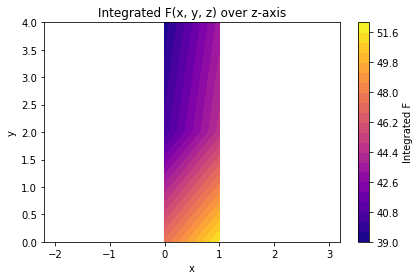

In [170]:
import matplotlib.pyplot as plt
from scipy import integrate  # optional, for Simpson's rule

# Evaluate function on the full grid
F = np.sin(X3G) + np.cos(Y3G) + Z3G**2

# Integrate along z-axis (axis=2) using the trapezoidal rule
I = np.trapz(F, eps, axis=2)

# Optionally use Simpson’s rule (if eps is evenly spaced and length >= 3)
# I = integrate.simpson(F, eps, axis=2)

# Create 2D meshgrid for plotting
xgrid, ygrid = np.meshgrid(x, y, indexing='ij')

# Plot the integrated result
plt.figure(figsize=(6, 4))
contour = plt.contourf(xgrid, ygrid, I, levels=20, cmap='plasma')
plt.colorbar(contour, label='Integrated F')
plt.title('Integrated F(x, y, z) over z-axis')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Ex 3: Working with large meshgrid size: replacing 3D grid by, 2D grid and  broadcasting
#### Note: Matrix size of 2000 $\times$2000 $\times$500 can be calculated smoothly with the below approach where making 3D meshgrid makes run time very large/unattainable.

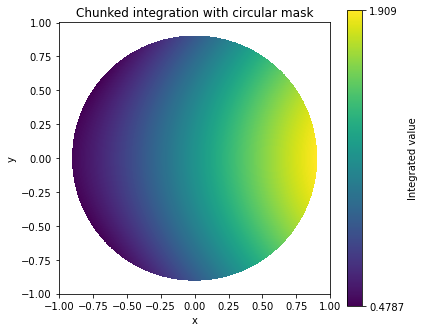

In [255]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define symmetric base arrays
x = np.linspace(-1, 1, 2000)
y = np.linspace(-1, 1, 2000)
z = np.linspace(0, 1, 500)

Nx, Ny, Nz = len(x), len(y), len(z)
chunk_size = 10

# 2. Create meshgrid in (x, y)
X2d, Y2d = np.meshgrid(x, y, indexing="ij")

# 3. Allocate integration result
I = np.zeros((Nx, Ny))

# 4. Integrate over z in chunks
for start in range(0, Nz, chunk_size):
    end = min(start + chunk_size, Nz)
    z_chunk = z[start:end]
    Z_chunk = z_chunk[None, None, :]

    F_chunk = np.sin(X2d[..., None]) + np.cos(Y2d[..., None]) + Z_chunk**2
    I += np.trapz(F_chunk, z_chunk, axis=2)

# 5. Circular mask: only keep points within radius r_max
r_max = 0.9
radius_sq = X2d**2 + Y2d**2
mask = radius_sq > r_max**2
I_masked = np.ma.array(I, mask=mask)

# 6. Plot
plt.figure(figsize=(6, 5))
vmin, vmax = I_masked.min(), I_masked.max()

pcm = plt.pcolormesh(x, y, I_masked.T, shading="auto", vmin=vmin, vmax=vmax)
cbar = plt.colorbar(pcm, label="Integrated value")
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels([f"{vmin:.4g}", f"{vmax:.4g}"])


plt.xlabel("x")
plt.ylabel("y")
plt.title("Chunked integration with circular mask")
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()
